In [1]:
# Imports - these are all the imports needed for the assignment
%matplotlib inline
from scipy import stats
import numpy.ma as ma
from scipy.stats import kstest, normaltest

import scipy
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
# 1a) Load the nba csv files

# YOUR CODE HERE
df_2008 = pd.read_csv('clean_players_2008.csv')

In [4]:
df_2008

Unnamed: 0  PLAYER_ID          PLAYER_NAME     TEAM_ID TEAM_ABBREVIATION  \
0             0     201166         Aaron Brooks  1610612745               HOU   
1             1     201189           Aaron Gray  1610612741               CHI   
2             2     201151             Acie Law  1610612737               ATL   
3             3     200747        Adam Morrison  1610612747               LAL   
4             4       1502         Adonal Foyle  1610612753               ORL   
5             5       1733        Al Harrington  1610612752               NYK   
6             6     201143           Al Horford  1610612737               ATL   
7             7       2744         Al Jefferson  1610612750               MIN   
8             8     201154          Al Thornton  1610612746               LAC   
9             9     201169        Alando Tucker  1610612756               PHX   
10           10     101165           Alex Acker  1610612746               LAC   
11           11     201582        Alexis Ajinca  1610612766               CHA   
12           12        947        Allen Iverson  1610612765               DET   
13           13       2405    Amar'e Stoudemire  1610612756               PHX   
14           14     101161         Amir Johnson  1610612765               DET   
15           15       2760     Anderson Varejao  1610612739               CLE   
16           16     101154       Andray Blatche  1610612764               WAS   
17           18       2738       Andre Iguodala  1610612755               PHI   
18           19       1889         Andre Miller  1610612755               PHI   
19           20     200745      Andrea Bargnani  1610612761               TOR   
20           21       1905     Andrei Kirilenko  1610612762               UTA   
21           22       2804       Andres Nocioni  1610612758               SAC   
22           23     101106         Andrew Bogut  1610612749               MIL   
23           24     101115         Andrew Bynum  1610612747               LAL   
24           25       2740      Andris Biedrins  1610612744               GSW   
25           26       1712       Antawn Jamison  1610612764               WAS   
26           27       1853       Anthony Carter  1610612743               DEN   
27           28       1533      Anthony Johnson  1610612753               ORL   
28           29     201627       Anthony Morrow  1610612744               GSW   
29           30       1515       Anthony Parker  1610612761               TOR   
..          ...        ...                  ...         ...               ...   
380         413       1495           Tim Duncan  1610612759               SAS   
381         414       1501           Tim Thomas  1610612741               CHI   
382         415       2754           Tony Allen  1610612738               BOS   
383         416       1499          Tony Battie  1610612753               ORL   
384         417       2225          Tony Parker  1610612759               SAS   
385         418       1503        Tracy McGrady  1610612745               HOU   
386         419     101143        Travis Diener  1610612754               IND   
387         420       2566        Travis Outlaw  1610612757               POR   
388         421       2239      Trenton Hassell  1610612751               NJN   
389         422       2772         Trevor Ariza  1610612747               LAL   
390         424       2211          Troy Murphy  1610612754               IND   
391         425       1731           Tyronn Lue  1610612753               ORL   
392         426     200748         Tyrus Thomas  1610612741               CHI   
393         427       2199       Tyson Chandler  1610612740               NOH   
394         428       2617        Udonis Haslem  1610612748               MIA   
395         429       1713         Vince Carter  1610612751               NJN   
396         430       2209  Vladimir Radmanovic  1610612766               CHA   
397         431     101144          

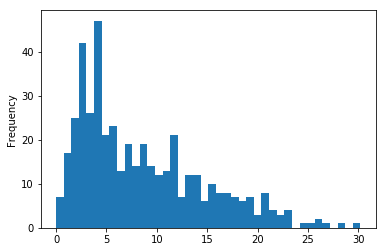

In [4]:
df_2008['PTS'].plot.hist(bins=40)

In [5]:
df_2008.columns[1:]
#pts_2016 = df_2016.as_matrix(columns=df_2016.columns[27:])
#x = pts_2016 #The array needs to be larger than 20, just an example
#mx = ma.masked_array(x)
#z,pval = mstats.normaltest(mx)

#if(pval < 0.055):
#   print("Not normal distribution")

Index(['PLAYER_ID', 'PLAYER_NAME', 'TEAM_ID', 'TEAM_ABBREVIATION', 'AGE', 'GP',
       'W', 'L', 'W_PCT', 'MIN', 'FGM', 'FGA', 'FG_PCT', 'FG3M', 'FG3A',
       'FG3_PCT', 'FTM', 'FTA', 'FT_PCT', 'OREB', 'DREB', 'REB', 'AST', 'TOV',
       'STL', 'BLK', 'BLKA', 'PF', 'PFD', 'PTS', 'PLUS_MINUS',
       'NBA_FANTASY_PTS', 'DD2', 'TD3', 'GP_RANK', 'W_RANK', 'L_RANK',
       'W_PCT_RANK', 'MIN_RANK', 'FGM_RANK', 'FGA_RANK', 'FG_PCT_RANK',
       'FG3M_RANK', 'FG3A_RANK', 'FG3_PCT_RANK', 'FTM_RANK', 'FTA_RANK',
       'FT_PCT_RANK', 'OREB_RANK', 'DREB_RANK', 'REB_RANK', 'AST_RANK',
       'TOV_RANK', 'STL_RANK', 'BLK_RANK', 'BLKA_RANK', 'PF_RANK', 'PFD_RANK',
       'PTS_RANK', 'PLUS_MINUS_RANK', 'NBA_FANTASY_PTS_RANK', 'DD2_RANK',
       'TD3_RANK', 'CFID', 'CFPARAMS'],
      dtype='object')

In [6]:
z,pval = stats.normaltest(df_2008['PTS'])
print(z, pval)
if(pval < 0.05):
    print('PTS Is not from a Normal Dist')
else:
    print('PTS Is likley from a Normal Dist')

size = df_2008['PTS'].size
x = scipy.arange(size)
param = stats.gamma.fit(df_2008['PTS'])
stat, kpval = kstest(df_2008['PTS'], 'gamma', param)
print(stat, kpval)
if(kpval < 0.05):
    print('PTS Is not from a Gamma Dist')
else:
    print('PTS Is likley from a Gamma Dist')
    
param = stats.lognorm.fit(df_2008['PTS'])
stat, kpval = kstest(df_2008['PTS'], 'lognorm', param)
print(stat, kpval)
if(kpval < 0.05):
    print('PTS Is not from a Log norm Dist')
else:
    print('PTS Is likley from a Log norm Dist')

40.4835608639 1.61847671097e-09
PTS Is not from a Normal Dist
0.0663624205402 0.0516130990174
PTS Is likley from a Gamma Dist
0.0639351496205 0.0670265594852
PTS Is likley from a Log norm Dist


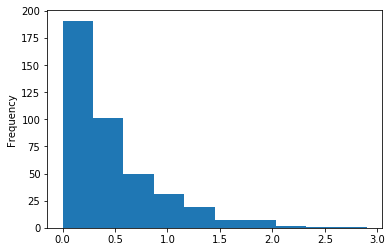

In [7]:
df_2008['BLK'].plot.hist(bins=10)

In [9]:
z,pval = stats.normaltest(df_2008['BLK'])
print(z, pval)
if(pval < 0.05):
    print('BLK Is not from a Normal Dist')
else:
    print('BLK Is likley from a Normal Dist')
    
size = df_2008['BLK'].size
x = scipy.arange(size)
param = stats.expon.fit(df_2008['BLK'])
stat, kpval = kstest(df_2008['BLK'], 'expon', param)
print(stat, kpval)
if(kpval < 0.05):
    print('BLK Is not from a Exponen Dist')
else:
    print('BLK Is likley from a Exponen Dist')
param = stats.gamma.fit(df_2008['BLK'])
stat, kpval = kstest(df_2008['BLK'], 'gamma', param)
print(stat, kpval)
if(kpval < 0.05):
    print('BLK Is not from a Gamma Dist')
else:
    print('BLK Is likley from a Gamma Dist')
param = stats.lognorm.fit(df_2008['BLK'])
stat, kpval = kstest(df_2008['BLK'], 'lognorm', param)
print(stat, kpval)
if(kpval < 0.05):
    print('BLK Is not from a Log norm Dist')
else:
    print('BLK Is likley from a Log norm Dist')
param = stats.chi2.fit(df_2008['BLK'])
stat, kpval = kstest(df_2008['BLK'], 'chi2', param)
print(stat, kpval)
if(kpval < 0.05):
    print('BLK Is not from a Chisq Dist')
else:
    print('BLK Is likley from a Chisq Dist')


153.753516431 4.10060673287e-34
BLK Is not from a Normal Dist
0.130304706376 1.57288306135e-06
BLK Is not from a Exponen Dist
0.197749958846 1.59872115546e-14
BLK Is not from a Gamma Dist
0.115710360697 3.07355315927e-05
BLK Is not from a Log norm Dist
0.150858836842 1.30393167375e-08
BLK Is not from a Chisq Dist


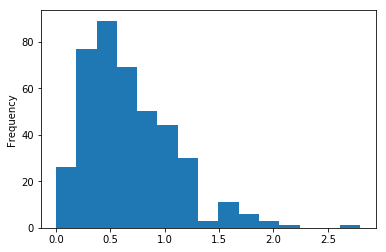

In [11]:
df_2008['STL'].plot.hist(bins=15)

In [13]:
z,pval = stats.normaltest(df_2008['STL'])
print(z, pval)
if(pval < 0.05):
    print('STL Is not from a Normal Dist')
else:
    print('STL Is likley from a Normal Dist')
    
size = df_2008['STL'].size
x = scipy.arange(size)
param = stats.gamma.fit(df_2008['STL'])
stat, kpval = kstest(df_2008['STL'], 'gamma', param)
print(stat, kpval)
if(kpval < 0.05):
    print('STL Is not from a Gamma Dist')
else:
    print('STL Is likley from a Gamma Dist')

param = stats.expon.fit(df_2008['STL'])
stat, kpval = kstest(df_2008['STL'], 'expon', param)
print(stat, kpval)
if(kpval < 0.05):
    print('STL Is not from a Exponen Dist')
else:
    print('STL Is likley from a Exponen Dist')

param = stats.lognorm.fit(df_2008['STL'])
stat, kpval = kstest(df_2008['STL'], 'lognorm', param)
print(stat, kpval)
if(kpval < 0.05):
    print('STL Is not from a Log norm Dist')
else:
    print('STL Is likley from a Log norm Dist')
    

68.2484603513 1.51368370428e-15
STL Is not from a Normal Dist
0.0647173660951 0.0616786751499
STL Is likley from a Gamma Dist
0.212979366148 0.0
STL Is not from a Exponen Dist
0.0703627800352 0.0328485292621
STL Is not from a Log norm Dist


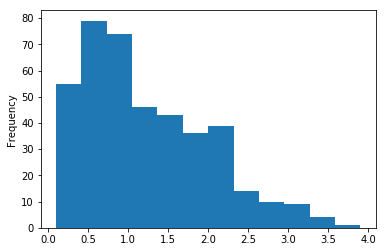

In [14]:
df_2008['TOV'].plot.hist(bins=12)

In [15]:
z,pval = stats.normaltest(df_2008['TOV'])
print(z, pval)
if(pval < 0.05):
    print('TOV Is not from a Normal Dist')
else:
    print('TOV Is likley from a Normal Dist')
    
size = df_2008['TOV'].size
x = scipy.arange(size)
param = stats.gamma.fit(df_2008['TOV'])
stat, kpval = kstest(df_2008['TOV'], 'gamma', param)
print(stat, kpval)
if(kpval < 0.05):
    print('TOV Is not from a Gamma Dist')
else:
    print('TOV Is likley from a Gamma Dist')
    
param = stats.lognorm.fit(df_2008['TOV'])
stat, kpval = kstest(df_2008['TOV'], 'lognorm', param)
print(stat, kpval)
if(kpval < 0.05):
    print('TOV Is not from a Log norm Dist')
else:
    print('TOV Is likley from a Log norm Dist')

37.0821300164 8.86579690394e-09
TOV Is not from a Normal Dist
0.0593393989896 0.107046159006
TOV Is likley from a Gamma Dist
0.0682818259643 0.0416899207581
TOV Is not from a Log norm Dist


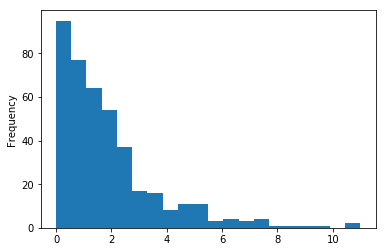

In [16]:
df_2008['AST'].plot.hist(bins=20)

In [17]:
z,pval = stats.normaltest(df_2008['AST'])
print(z, pval)
if(pval < 0.05):
    print('AST Is not from a Normal Dist')
else:
    print('AST Is likley from a Normal Dist')

size = df_2008['AST'].size
x = scipy.arange(size)
param = stats.gamma.fit(df_2008['AST'])
stat, kpval = kstest(df_2008['AST'], 'gamma', param)
print(stat, kpval)
if(kpval < 0.05):
    print('AST Is not from a Gamma Dist')
else:
    print('AST Is likley from a Gamma Dist')

param = stats.lognorm.fit(df_2008['AST'])
stat, kpval = kstest(df_2008['AST'], 'lognorm', param)
print(stat, kpval)
if(kpval < 0.05):
    print('AST Is not from a Log norm Dist')
else:
    print('AST Is likley from a Log norm Dist')

173.141089232 2.52865848216e-38
AST Is not from a Normal Dist
0.0456986111277 0.350058981203
AST Is likley from a Gamma Dist
0.0509929232809 0.229197646304
AST Is likley from a Log norm Dist


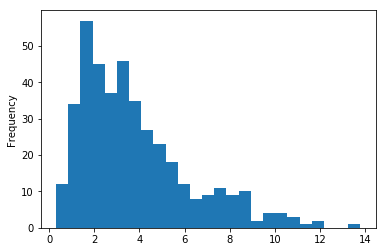

In [18]:
df_2008['REB'].plot.hist(bins=25)

In [19]:
z,pval = stats.normaltest(df_2008['REB'])
print(z, pval)
if(pval < 0.05):
    print('REB Is not from a Normal Dist')
else:
    print('REB Is likley from a Normal Dist')
    
size = df_2008['REB'].size
x = scipy.arange(size)
param = stats.gamma.fit(df_2008['REB'])
stat, kpval = kstest(df_2008['REB'], 'gamma', param)
print(stat, kpval)
if(kpval < 0.05):
    print('REB Is not from a Gamma Dist')
else:
    print('REB Is likley from a Gamma Dist')

param = stats.lognorm.fit(df_2008['REB'])
stat, kpval = kstest(df_2008['REB'], 'lognorm', param)
print(stat, kpval)
if(kpval < 0.05):
    print('REB Is not from a Log norm Dist')
else:
    print('REB Is likley from a Log norm Dist')

74.33917222 7.20201228414e-17
REB Is not from a Normal Dist
0.0359736694904 0.67588416731
REB Is likley from a Gamma Dist
0.0340129008392 0.729940749337
REB Is likley from a Log norm Dist
